In [51]:
# import library
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# import dataset
file_path = 'Movies.csv'
df = pd.read_csv(file_path, header=0)
print(df)

    Production Budget      Genre  Worldwide Gross Income
0                  43     action                      94
1                  43  adventure                     140
2                  44     action                      80
3                  44  adventure                     132
4                  45  adventure                     110
..                ...        ...                     ...
95                103     action                     230
96                104  adventure                     101
97                104    musical                     155
98                104  adventure                     175
99                104  adventure                     137

[100 rows x 3 columns]


In [52]:
# iloc
X = df.iloc[:, :].values

print("X: \n", X)

X: 
 [[43 'action' 94]
 [43 'adventure' 140]
 [44 'action' 80]
 [44 'adventure' 132]
 [45 'adventure' 110]
 [45 'action' 126]
 [48 'adventure' 51]
 [48 'action' 65]
 [48 'action' 123]
 [48 'action' 108]
 [50 'western' 26]
 [50 'adventure' 52]
 [53 'musical' 59]
 [53 'adventure' 140]
 [55 'action' 20]
 [55 'action' 180]
 [61 'adventure' 102]
 [61 'adventure' 60]
 [61 'adventure' 90]
 [61 'adventure' 95]
 [63 'action' 123]
 [63 'adventure' 39]
 [65 'adventure' 37]
 [65 'adventure' 79]
 [65 'action' 59]
 [65 'action' 152]
 [67 'adventure' 107]
 [67 'action' 67]
 [71 'adventure' 42]
 [71 'adventure' 76]
 [73 'action' 31]
 [73 'action' 60]
 [74 'action' 165]
 [74 'adventure' 65]
 [77 'action' 84]
 [77 'action' 110]
 [77 'action' 88]
 [77 'action' 32]
 [79 'adventure' 55]
 [79 'adventure' 111]
 [79 'action' 135]
 [79 'thriller_suspense' 221]
 [80 'adventure' 124]
 [80 'adventure' 105]
 [81 'adventure' 73]
 [81 'adventure' 107]
 [81 'action' 122]
 [81 'action' 45]
 [82 'adventure' 80]
 [82 'a

In [53]:
# missing values
print(df.isna().sum())

Production Budget         0
Genre                     0
Worldwide Gross Income    0
dtype: int64


In [54]:
# encoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])],
                       remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[1.0 0.0 0.0 0.0 0.0 0.0 43 94]
 [0.0 1.0 0.0 0.0 0.0 0.0 43 140]
 [1.0 0.0 0.0 0.0 0.0 0.0 44 80]
 [0.0 1.0 0.0 0.0 0.0 0.0 44 132]
 [0.0 1.0 0.0 0.0 0.0 0.0 45 110]
 [1.0 0.0 0.0 0.0 0.0 0.0 45 126]
 [0.0 1.0 0.0 0.0 0.0 0.0 48 51]
 [1.0 0.0 0.0 0.0 0.0 0.0 48 65]
 [1.0 0.0 0.0 0.0 0.0 0.0 48 123]
 [1.0 0.0 0.0 0.0 0.0 0.0 48 108]
 [0.0 0.0 0.0 0.0 0.0 1.0 50 26]
 [0.0 1.0 0.0 0.0 0.0 0.0 50 52]
 [0.0 0.0 0.0 1.0 0.0 0.0 53 59]
 [0.0 1.0 0.0 0.0 0.0 0.0 53 140]
 [1.0 0.0 0.0 0.0 0.0 0.0 55 20]
 [1.0 0.0 0.0 0.0 0.0 0.0 55 180]
 [0.0 1.0 0.0 0.0 0.0 0.0 61 102]
 [0.0 1.0 0.0 0.0 0.0 0.0 61 60]
 [0.0 1.0 0.0 0.0 0.0 0.0 61 90]
 [0.0 1.0 0.0 0.0 0.0 0.0 61 95]
 [1.0 0.0 0.0 0.0 0.0 0.0 63 123]
 [0.0 1.0 0.0 0.0 0.0 0.0 63 39]
 [0.0 1.0 0.0 0.0 0.0 0.0 65 37]
 [0.0 1.0 0.0 0.0 0.0 0.0 65 79]
 [1.0 0.0 0.0 0.0 0.0 0.0 65 59]
 [1.0 0.0 0.0 0.0 0.0 0.0 65 152]
 [0.0 1.0 0.0 0.0 0.0 0.0 67 107]
 [1.0 0.0 0.0 0.0 0.0 0.0 67 67]
 [0.0 1.0 0.0 0.0 0.0 0.0 71 42]
 [0.0 1.0 0.0 0.0 0.0 0.0 71 76

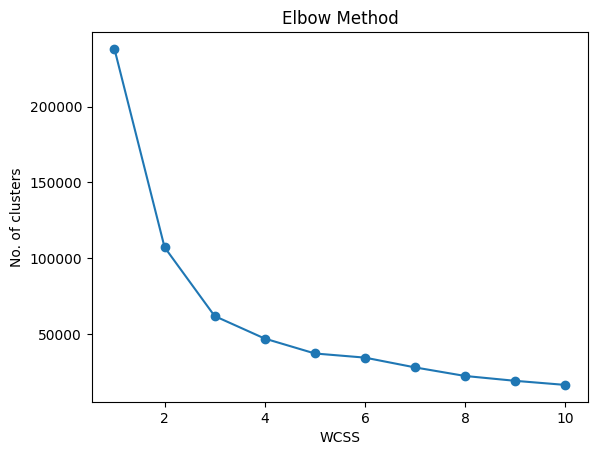

In [55]:
# Elbow Method
wcss = []

for i in range(1, 11) :
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, marker = "o")
plt.title("Elbow Method") # plot title
plt.xlabel("WCSS") # x-axis label
plt.ylabel("No. of clusters") # y-axis label
plt.show() # displays the figure


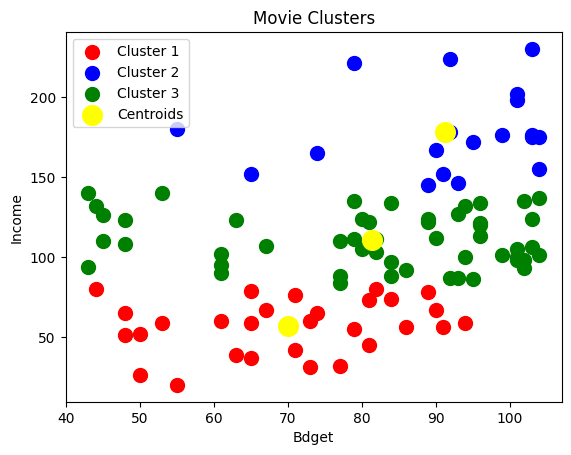

In [56]:
# Kmeans
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
x_kmeans = kmeans.fit_predict(X)

plt.scatter(X[x_kmeans==0,-2], X[x_kmeans==0,-1], s=100, c='red', label='Cluster 1')
plt.scatter(X[x_kmeans==1,-2], X[x_kmeans==1,-1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[x_kmeans==2,-2], X[x_kmeans==2,-1], s=100, c='green', label='Cluster 3')

plt.scatter(kmeans.cluster_centers_[:,-2], kmeans.cluster_centers_[:,-1],
            s=200, c='yellow', label="Centroids")

plt.title("Movie Clusters")
plt.xlabel("Bdget")
plt.ylabel('Income')
plt.legend()
plt.show()



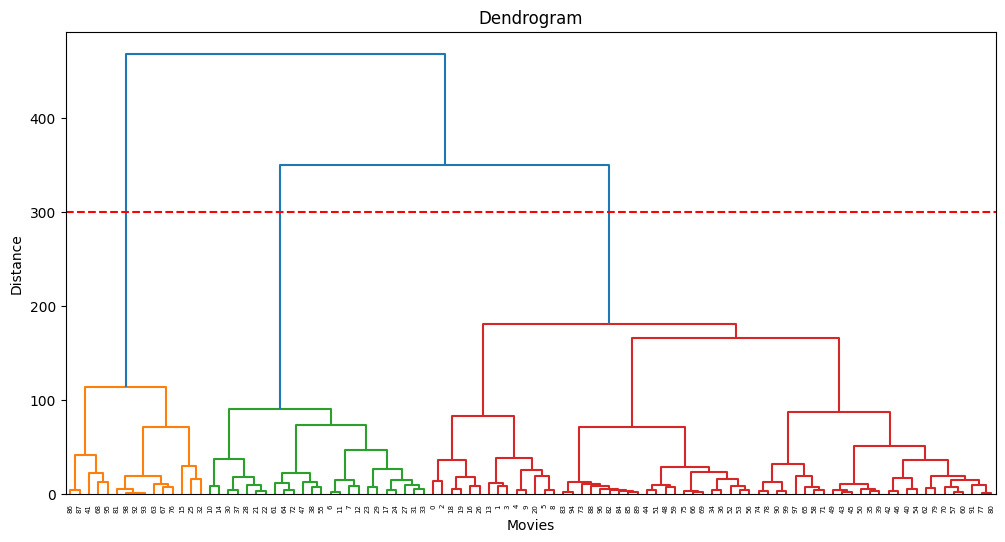

In [57]:
# dendogram
plt.figure(figsize=(12,6))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Movies")
plt.ylabel("Distance")
plt.axhline(y=300, color='red', linestyle='--')
plt.show()

In [58]:
hc = AgglomerativeClustering(
    n_clusters=3,      # or 4 — based on dendrogram
    metric='euclidean',
    linkage='ward'
)

y_hc = hc.fit_predict(X)

print(df)


    Production Budget      Genre  Worldwide Gross Income
0                  43     action                      94
1                  43  adventure                     140
2                  44     action                      80
3                  44  adventure                     132
4                  45  adventure                     110
..                ...        ...                     ...
95                103     action                     230
96                104  adventure                     101
97                104    musical                     155
98                104  adventure                     175
99                104  adventure                     137

[100 rows x 3 columns]


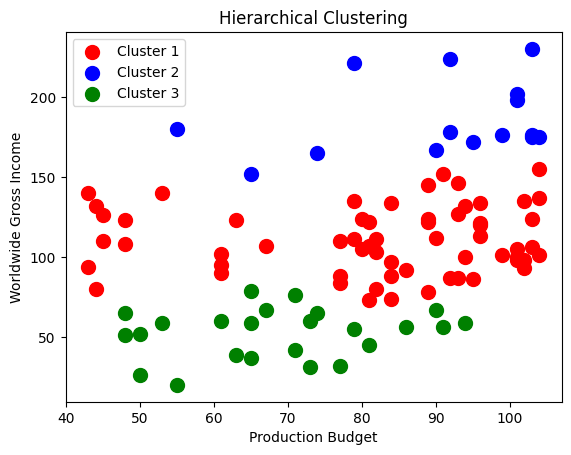

In [61]:
plt.scatter(X[y_hc==0,-2], X[y_hc==0,-1],
            s=100, c='red', label='Cluster 1')
plt.scatter(X[y_hc==1,-2], X[y_hc==1,-1],
            s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_hc==2,-2], X[y_hc==2,-1],
            s=100, c='green', label='Cluster 3')

plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross Income')
plt.title('Hierarchical Clustering')
plt.legend()
plt.show()
